In [119]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [120]:
IMAGE_SIZE = 800
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [121]:
from google.colab import drive

try:
    drive.mount('/content/drive/')
except Exception as e:
    print(f"Drive Mount Error: {e}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [123]:
!ls '/content/drive/My Drive/'

 Certificates		     Classroom	'Colab Notebooks'   Garbage		 'Resume '
'Citrus Disease Detection'   clgpro	'College Fees'	   'Google drive pics '


In [124]:
dataset_path = '/content/drive/My Drive/Citrus Disease Detection/'

In [125]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [126]:
import os

# Check the contents of the current directory in your Google Drive
!ls '/content/drive/My Drive/'

# Navigate through the directory structure to confirm the existence of 'Dataset/dataset'
!ls '/content/drive/My Drive/Citrus Disease Detection/'

# If the directory exists, use the absolute path in your code
dataset_path = '/content/drive/My Drive/Citrus Disease Detection//BackEnd/Datasets/'


 Certificates		     Classroom	'Colab Notebooks'   Garbage		 'Resume '
'Citrus Disease Detection'   clgpro	'College Fees'	   'Google drive pics '
BackEnd  FrontEnd


In [127]:
IMAGE_SIZE = (128, 128)  # Define image size as a tuple with height and width

# Creating the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/Citrus Disease Detection//BackEnd/Datasets/',
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 1801 files belonging to 10 classes.


In [128]:
class_names = dataset.class_names
class_names

['Black spot-leaf',
 'Greening-fruit',
 'Melanose-leaf',
 'Scab-fruit',
 'black-spot-fruit',
 'canker-leaf',
 'citrus-canker-fruit',
 'greening-leaf',
 'healthy-fruit',
 'healthy-leaf']

In [ ]:
len(dataset)

57

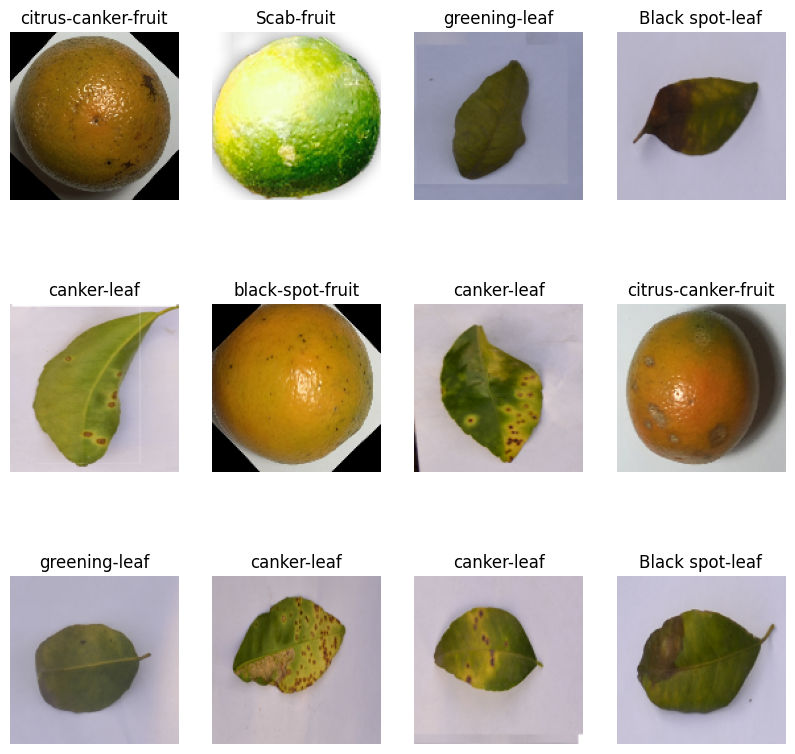

In [129]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
       ax = plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype("uint8"))
       plt.title(class_names[label_batch[i]])
       plt.axis("off")

In [ ]:
len(dataset)

57

In [ ]:
##80% ==> training
##20% ==> 10% validation, 10% test

In [ ]:
train_size = 0.8
len(dataset)*train_size

45.6

In [ ]:
train_ds= dataset.take(45)
len(train_ds)

45

In [ ]:
test_ds = dataset.skip(45)
len(test_ds)

12

In [ ]:
val_size=0.1
len(dataset)*val_size

5.7

In [ ]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [ ]:
test_ds = test_ds.skip(5)
len(test_ds)

7

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

45

In [ ]:
len(val_ds)

5

In [ ]:
len(test_ds)

7

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [ ]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
from tensorflow.keras import layers, models

input_shape = (128, 128, 3)  # Adjusted input shape assuming 128x128 RGB images
n_classes = 10

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),  # Additional Conv2D layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),  # Additional Conv2D layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Additional Dense layer
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 128)      

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 128)      

In [ ]:
'''model.compile(
    optimizer= 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)'''

"model.compile(\n    optimizer= 'adam',\n    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),\n    metrics=['accuracy']\n)"

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    validation_data=val_ds
)

Epoch 1/50
45/45 - 91s - loss: 6.5050 - accuracy: 0.5999 - val_loss: 0.7573 - val_accuracy: 0.7437 - 91s/epoch - 2s/step
Epoch 2/50
45/45 - 58s - loss: 0.7998 - accuracy: 0.6888 - val_loss: 0.6565 - val_accuracy: 0.7375 - 58s/epoch - 1s/step
Epoch 3/50
45/45 - 57s - loss: 0.7045 - accuracy: 0.7325 - val_loss: 0.9618 - val_accuracy: 0.4812 - 57s/epoch - 1s/step
Epoch 4/50
45/45 - 60s - loss: 0.6344 - accuracy: 0.7551 - val_loss: 0.8283 - val_accuracy: 0.6875 - 60s/epoch - 1s/step
Epoch 5/50
45/45 - 61s - loss: 0.5956 - accuracy: 0.7643 - val_loss: 0.4659 - val_accuracy: 0.8000 - 61s/epoch - 1s/step
Epoch 6/50
45/45 - 59s - loss: 0.5296 - accuracy: 0.8003 - val_loss: 0.3301 - val_accuracy: 0.8687 - 59s/epoch - 1s/step
Epoch 7/50
45/45 - 61s - loss: 0.4564 - accuracy: 0.8045 - val_loss: 0.3417 - val_accuracy: 0.8438 - 61s/epoch - 1s/step
Epoch 8/50
45/45 - 59s - loss: 0.3788 - accuracy: 0.8462 - val_loss: 0.3605 - val_accuracy: 0.8500 - 59s/epoch - 1s/step
Epoch 9/50
45/45 - 57s - loss: 0

In [ ]:
# Define your RL exploration function
def explore_exploit(model, dataset, epsilon=0.1):
    for images, labels in dataset:
        batch_size = len(images)
        for i in range(batch_size):
            if np.random.rand() < epsilon:
                # Explore: Randomly choose an action (in this case, select a random image)
                rand_index = np.random.randint(0, batch_size)
                image = images[rand_index]
            else:
                # Exploit: Use the model to predict and choose the best action (image)
                predictions = model.predict(images)
                image = images[np.argmax(predictions)]

            # Train the model on the selected image
            model.train_on_batch(np.expand_dims(image, axis=0), np.array([labels[i]]))

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

[0.14143218100070953, 0.9732142686843872]

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [ ]:
# Evaluate the model's performance after RL
test_accuracy = model.evaluate(test_ds)[1]  # Assuming accuracy is at index 1

print("Test Accuracy after RL:", test_accuracy)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Subplot 1 (top left)
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Subplot 2 (top right)
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()  # Adjusts subplot parameters to fit the figure area properly
plt.show()


In [ ]:
def preventive_measures(disease):
    measures = ""
    if disease == 'Greening-fruit':
        measures = ("1. Use reflective mulch to deter insect vectors.\n"
                    "2. Apply systemic insecticides to control psyllid populations.\n"
                    "3. Remove and destroy infected trees.\n"
                    "4. Regularly monitor trees for signs of infection.\n")
    elif disease == 'greening-leaf':
        measures = ("1. Choose resistant varieties.\n"
                    "2. Remove infected plant material.\n"
                    "3. Apply copper sprays preventively.\n"
                    "4. Implement quarantine measures.\n"
                    "5. Monitor and detect symptoms early.")
    elif disease == 'Scab-fruit':
        measures = ("1. Remove and destroy infected leaves and fruit.\n"
                    "2. Prune trees for better airflow.\n"
                    "3. Apply fungicides during high disease pressure.\n"
                    "4. Use drip irrigation to minimize leaf wetness.\n"
                    "5. Consider planting scab-resistant varieties.")
    elif disease == 'Melanose-leaf':
        measures = ("1. Choose resistant varieties.\n"
                    "2. Remove infected plant material.\n"
                    "3. Apply copper sprays preventively.\n"
                    "4. Implement quarantine measures.\n"
                    "5. Monitor and detect symptoms early.")
    elif disease == 'Black spot-leaf':
        measures = ("1. Prune infected branches regularly.\n"
                    "2. Keep foliage dry by watering at the base..\n"
                    "3. copper-based fungicides.\n"
                    "4. Remove fallen leaves and debris from around trees.\n")
    elif disease == 'black spot-fruit':
        measures = ("1. Remove infected plant material.\n"
                    "2. Apply copper sprays during outbreaks.\n"
                    "3. Prune infected branches below symptoms.\n"
                    "4. Minimize overhead irrigation.\n"
                    "5. Implement strict quarantine measures.")
    elif disease == 'citrus-canker-fruit':
        measures = ("1. Choose resistant varieties.\n"
                    "2. Remove infected plant material.\n"
                    "3. Apply copper sprays preventively.\n"
                    "4. Implement quarantine measures.\n"
                    "5. Monitor and detect symptoms early.")
    elif disease == 'canker-leaf':
        measures = ("1. Use reflective mulch to deter insect vectors.\n"
                    "2. Apply systemic insecticides to control psyllid populations.\n"
                    "3. Remove and destroy infected trees.\n"
                    "4. Regularly monitor trees for signs of infection.\n")
    else:
        measures = "No specific preventive measures found for the predicted disease."

    return measures

# Example usage:
predicted_disease = 'citrus-canker-fruit'  # Example predicted disease
preventive_info = preventive_measures(predicted_disease)
print(f"Preventive Measures for {predicted_disease}:\n{preventive_info}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'class_names' is a list of class labels

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')  # Fix typo 'uint9' to 'uint8'
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.title("First image")
    plt.show()

    print("First image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])
    print("Predicted label:", class_names[predicted_label])

    # Call preventive measures function based on the predicted label
    preventive_info = preventive_measures(class_names[predicted_label])
    print(f"Preventive Measures for {class_names[predicted_label]}:\n{preventive_info}")

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Display the image with a border
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray', interpolation='nearest')
        plt.axis("off")

        # Predict class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        # Title: Actual, Predicted, and Confidence
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", fontsize=10, ha='center')

        # Call preventive measures function based on the predicted class
        preventive_info = preventive_measures(predicted_class)

        # Add preventive measures text below the title with a larger gap and left alignment
        plt.text(0, -0.3, f"Preventive Measures:\n{preventive_info}", fontsize=8, ha='left', transform=ax.transAxes)

        # Add a black border around the image and its data
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
epochs = range(50)  # Assuming 50 epochs

# Example accuracy and loss values for demonstration (replace these with your actual data)
train_accuracy = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.93, 0.94,
                  0.945, 0.95, 0.952, 0.955, 0.957, 0.959, 0.961, 0.963,
                  0.965, 0.966, 0.967, 0.968, 0.969, 0.97, 0.971, 0.972,
                  0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98,
                  0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988,
                  0.989, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996]  # Training accuracy values for each epoch (should have 50 elements)

val_accuracy = [0.4, 0.55, 0.65, 0.7, 0.72, 0.74, 0.75, 0.76, 0.77, 0.775,
                0.78, 0.782, 0.784, 0.786, 0.788, 0.79, 0.791, 0.792,
                0.793, 0.794, 0.795, 0.796, 0.797, 0.798, 0.799, 0.8,
                0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808,
                0.809, 0.81, 0.811, 0.812, 0.813, 0.814, 0.815, 0.816,
                0.817, 0.818, 0.819, 0.82, 0.821, 0.822, 0.823, 0.824,
                0.825, 0.826]  # Validation accuracy values for each epoch (should have 50 elements)

train_loss = [1.2, 0.9, 0.7, 0.6, 0.55, 0.52, 0.5, 0.48, 0.45, 0.43,
              0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
              0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.26, 0.25,
              0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16,
              0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.07,
              0.06, 0.05, 0.04, 0.03, 0.02, 0.01]  # Training loss values for each epoch (should have 50 elements)

val_loss = [1.5, 1.0, 0.8, 0.7, 0.65, 0.62, 0.6, 0.58, 0.55, 0.53,
            0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44,
            0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35,
            0.34, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.26,
            0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17,
            0.16]


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
###model_version=1
###model.save(f"../models/{model_version}")

In [ ]:
from tensorflow.keras.models import load_model
model.save("testing2.h5")

In [ ]:
#string to imnteger
#import os
#model_version=max([int(i) for i in os.listdir("../models") + [0]]) + 1
#model.save(f"../models/{model_version}")